## 手游玩家付费预测EDA
**目的：**利用制表、作图、特征分析等方法，对手游玩家的付费数据进行探索性数据分析，找出不同玩家之间的特点和规律，为接下来的预测模型提供思路和方法

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['font.sans-serif']=['simHei']
import warnings
warnings.filterwarnings('ignore')

In [39]:
# 分块读取再concat拼接
temp_df = []
for chunk in pd.read_table('E:/数据分析学习资料汇总/游戏玩家付费金额预测/tap4fun游戏玩家付费金额预测大赛/tap4fun竞赛数据/tap_fun_train.csv',\
              sep=',', chunksize=10000):
    temp_df.append(chunk)
data = pd.concat(temp_df, axis=0)
del temp_df

In [40]:
data.shape

(2288007, 109)

## 观察和理解特征

In [41]:
data.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2288007 entries, 0 to 2288006
Columns: 109 entries, user_id to prediction_pay_price
dtypes: float64(13), int64(95), object(1)
memory usage: 1.9+ GB


In [43]:
data.describe()

,user_id,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
count,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,...,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06
mean,1.529543e+06,4.543069e+05,3.698433e+05,1.897788e+05,1.376074e+05,8.075623e+04,3.613170e+04,5.855155e+05,3.548102e+05,7.538954e+04,...,2.148313e+00,1.059639e+00,9.838589e-01,2.844738e+00,2.832409e+00,2.556749e+00,1.020749e+01,5.346691e-01,5.770699e-02,1.793146e+00
std,9.399393e+05,4.958667e+06,3.737720e+06,4.670620e+06,3.370166e+06,2.220540e+06,1.782499e+06,5.868629e+06,3.400632e+06,9.662892e+05,...,1.167797e+01,9.074459e+00,8.951280e+00,1.276245e+01,1.271820e+01,1.184737e+01,3.895946e+01,2.263835e+01,7.090886e-01,8.846303e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.499925e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.419095e+06,4.203800e+04,9.830000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.458700e+04,6.470000e+03,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.833333e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.299006e+06,1.531180e+05,9.855700e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.360010e+05,6.605400e+04,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.833333e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.190530e+06,1.239962e+09,7.995875e+08,1.214869e+09,7.962378e+08,5.744961e+08,4.481972e+08,1.470644e+09,8.889537e+08,2.637228e+08,...,2.054000e+03,2.051000e+03,1.904000e+03,5.090000e+02,5.090000e+02,4.880000e+02,2.049667e+03,7.457950e+03,1.050000e+02,3.297781e+04


## 数据类型的观察（int/float/str）与转换（时间类型）

In [44]:
data.columns[data.dtypes=='object']

Index(['register_time'], dtype='object')

In [45]:
data.dtypes.value_counts() 
data.select_dtypes(include='object').head()

,register_time
0,2018-02-02 19:47:15
1,2018-01-26 00:01:05
2,2018-01-26 00:01:58
3,2018-01-26 00:02:13
4,2018-01-26 00:02:46


In [81]:
# 去除时分秒
data.register_time = pd.to_datetime(data.register_time).dt.normalize()

## 缺失值检测与 填充/删除

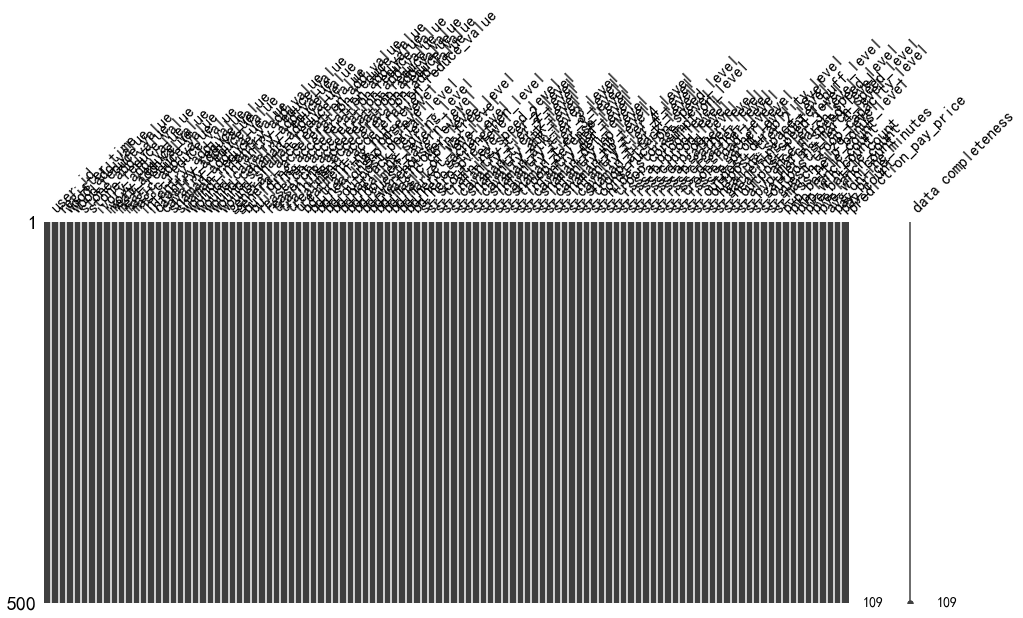

In [49]:
import missingno as msno
msno.matrix(data.sample(500),
           figsize=(16,7),
           width_ratios=(15,1),
           labels=True)

In [50]:
# 数据无缺失值
(data.isnull().sum()==0).value_counts()

True    109
dtype: int64

## 提取信息

In [51]:
pd.set_option('display.max_columns',None)
data.describe()

,user_id,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,magic_reduce_value,infantry_add_value,infantry_reduce_value,cavalry_add_value,cavalry_reduce_value,shaman_add_value,shaman_reduce_value,wound_infantry_add_value,wound_infantry_reduce_value,wound_cavalry_add_value,wound_cavalry_reduce_value,wound_shaman_add_value,wound_shaman_reduce_value,general_acceleration_add_value,general_acceleration_reduce_value,building_acceleration_add_value,building_acceleration_reduce_value,reaserch_acceleration_add_value,reaserch_acceleration_reduce_value,training_acceleration_add_value,training_acceleration_reduce_value,treatment_acceleraion_add_value,treatment_acceleration_reduce_value,bd_training_hut_level,bd_healing_lodge_level,bd_stronghold_level,bd_outpost_portal_level,bd_barrack_level,bd_healing_spring_level,bd_dolmen_level,bd_guest_cavern_level,bd_warehouse_level,bd_watchtower_level,bd_magic_coin_tree_level,bd_hall_of_war_level,bd_market_level,bd_hero_gacha_level,bd_hero_strengthen_level,bd_hero_pve_level,sr_scout_level,sr_training_speed_level,sr_infantry_tier_2_level,sr_cavalry_tier_2_level,sr_shaman_tier_2_level,sr_infantry_atk_level,sr_cavalry_atk_level,sr_shaman_atk_level,sr_infantry_tier_3_level,sr_cavalry_tier_3_level,sr_shaman_tier_3_level,sr_troop_defense_level,sr_infantry_def_level,sr_cavalry_def_level,sr_shaman_def_level,sr_infantry_hp_level,sr_cavalry_hp_level,sr_shaman_hp_level,sr_infantry_tier_4_level,sr_cavalry_tier_4_level,sr_shaman_tier_4_level,sr_troop_attack_level,sr_construction_speed_level,sr_hide_storage_level,sr_troop_consumption_level,sr_rss_a_prod_levell,sr_rss_b_prod_level,sr_rss_c_prod_level,sr_rss_d_prod_level,sr_rss_a_gather_level,sr_rss_b_gather_level,sr_rss_c_gather_level,sr_rss_d_gather_level,sr_troop_load_level,sr_rss_e_gather_level,sr_rss_e_prod_level,sr_outpost_durability_level,sr_outpost_tier_2_level,sr_healing_space_level,sr_gathering_hunter_buff_level,sr_healing_speed_level,sr_outpost_tier_3_level,sr_alliance_march_speed_level,sr_pvp_march_speed_level,sr_gathering_march_speed_level,sr_outpost_tier_4_level,sr_guest_troop_capacity_level,sr_march_size_level,sr_rss_help_bonus_level,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
count,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06
mean,1.529543e+06,4.543069e+05,3.698433e+05,1.897788e+05,1.376074e+05,8.075623e+04,3.613170e+04,5.855155e+05,3.548102e+05,7.538954e+04,4.725399e+04,1.436104e+02,2.267821e+02,1.282639e+02,1.

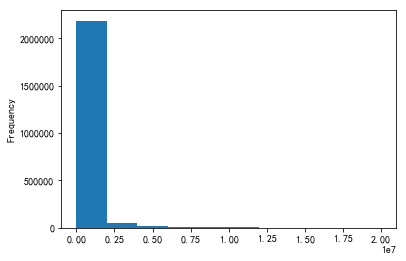

In [52]:
# 切比雪夫来消除极值
data[data.wood_add_value<20000000].wood_add_value.plot.hist()

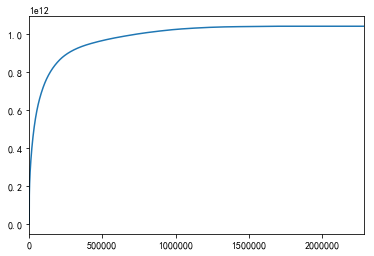

In [53]:
# 累加图，可以看出大部分的贡献集中在少部分玩家中，二八法则
data.sort_values('wood_add_value',ascending = False).wood_add_value.cumsum().reset_index(drop=True).plot()

In [54]:
data.register_time.min()

Timestamp('2018-01-26 00:00:00')

In [55]:
data.register_time.max()

Timestamp('2018-03-06 00:00:00')

In [56]:
data.register_time.max()-data.register_time.min()

Timedelta('39 days 00:00:00')

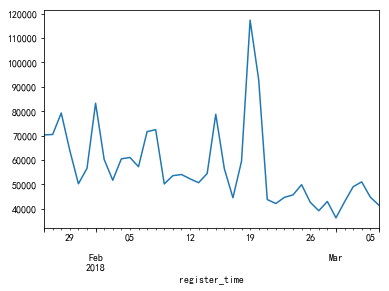

In [57]:
# 每日新增用户数,总体下降，2月19号前后有一波大高潮
data.groupby('register_time').user_id.count().plot()

In [58]:
# 45日内无消费用户占比
(data.prediction_pay_price==0).value_counts()

True     2242019
False      45988
Name: prediction_pay_price, dtype: int64

### 抽样分析有代表性特征的分布情况

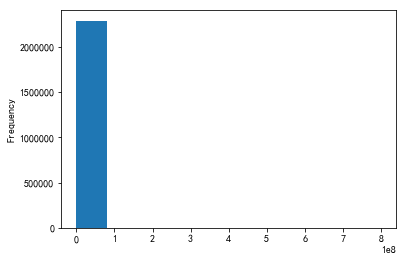

In [59]:
data.wood_reduce_value.plot.hist()

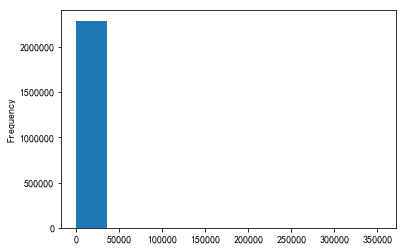

In [60]:
data.cavalry_add_value.plot.hist()

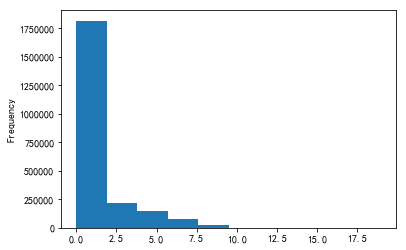

In [61]:
data.bd_healing_lodge_level.plot.hist()

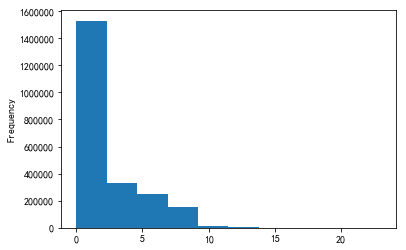

In [62]:
data.bd_stronghold_level.plot.hist()

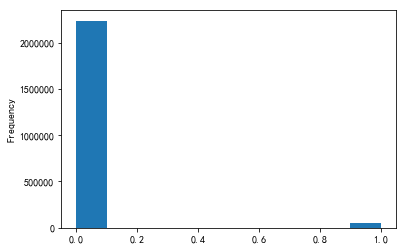

In [63]:
data.sr_cavalry_tier_2_level.plot.hist()

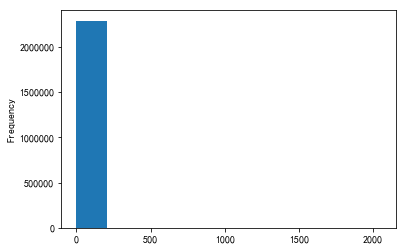

In [64]:
data.pvp_battle_count.plot.hist()

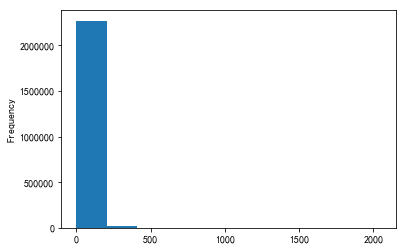

In [65]:
data.avg_online_minutes.plot.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024C02BC2908>,
      dtype=object)

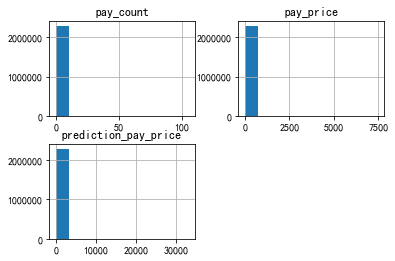

In [66]:
data[['pay_price','pay_count','prediction_pay_price']].hist()

- 整体体征都严重偏斜，大部分玩家只玩了很短的时间

In [67]:
lt = []
lt.append(data[data.pay_count==0].pay_count.count())
lt.append(data[data.pay_count>0].pay_count.count())
lt.append(data[data.pay_count==1].pay_count.count())
lt.append(data[data.pay_count>1].pay_count.count())
lt

[2246568, 41439, 17622, 23817]

付费率 0.018111395638212645


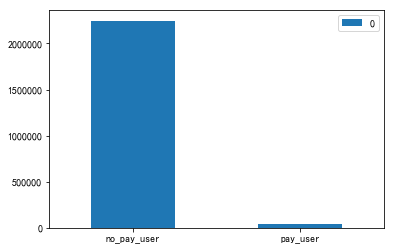

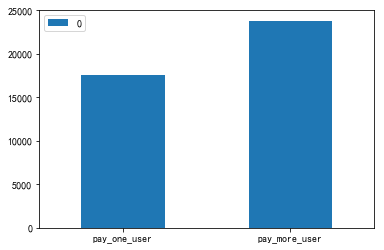

In [68]:
# 大部分是不付费用户
# 在付费用户中，多次付费的用户高于只付费一次的用户，因此要提高付费率
df = pd.DataFrame(lt, index=['no_pay_user', 'pay_user', 'pay_one_user', 'pay_more_user'])
df.iloc[0:2].plot.bar()
plt.xticks(rotation=0)
df.iloc[2:].plot.bar()
plt.xticks(rotation=0)
# 付费率
print('付费率',data[data.pay_count>0].user_id.count() / data.user_id.count())

- 大部分是不付费用户
- 在付费用户中，多次付费的用户高于只付费一次的用户，因此要提高付费率

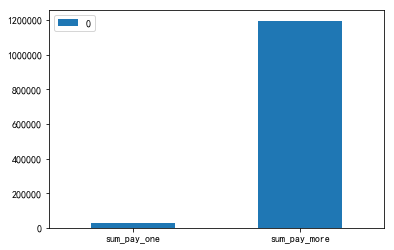

In [69]:
df1 = pd.DataFrame([data[data.pay_count==1].pay_price.sum(), data[data.pay_count>1].pay_price.sum()],\
                  index=['sum_pay_one', 'sum_pay_more'])
df1.plot.bar()
plt.xticks(rotation=0)
plt.show()

- 付费多次的用户付费总额也远高于付费一次的用户

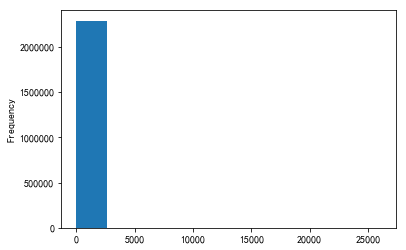

In [70]:
data['price_diff'] = data.prediction_pay_price - data.pay_price
data.price_diff.plot.hist()

In [71]:
# 前7日付费后不再付费用户
unactive_user = data[(data.pay_price>0) & (data.price_diff==0)]
unactive_user.shape

(30130, 110)

In [72]:
# 前7日不付费，后45日有付费的用户
data[(data.pay_price==0) & (data.price_diff>0)].shape

(4549, 110)

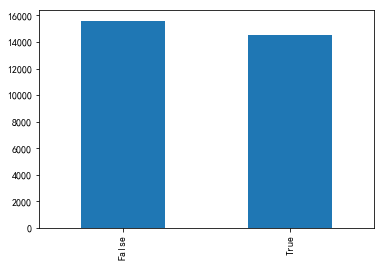

In [73]:
(unactive_user.pay_count>1).value_counts().plot.bar()

- 前7日付费后不再付费用户中， 只付费1次与付费多次的占比相当

In [74]:
# ARPU ARPPU
print('ARPU =', data.pay_price.sum() / data.user_id.count())
print('ARPPU =', data.pay_price.sum() / data[data.pay_price>0].user_id.count())

ARPU = 0.5346691072186407
ARPPU = 29.52114336735926


In [75]:
# 所有用户日平均在线时长，和周平均在线时长
print('所有用户日平均在线时长(min):', data.avg_online_minutes.sum()/data.user_id.count())
print('所有用户周平均在线时长(min):', data.avg_online_minutes.sum()*7/data.user_id.count())

所有用户日平均在线时长(min): 10.207489627811018
所有用户周平均在线时长(min): 71.45242739467713


In [76]:
# 付费用户日平均在线时长 与 不付费用户日平均在线时长
print('付费用户日平均在线时长(min):', data[data.pay_price>0].avg_online_minutes.sum()/data[data.pay_price>0].user_id.count())
print('不付费用户日平均在线时长(min):', data[data.pay_price==0].avg_online_minutes.sum()/data[data.pay_price==0].user_id.count())

付费用户日平均在线时长(min): 140.18774584526656
不付费用户日平均在线时长(min): 7.8099428643054685


In [77]:
# 定义活跃用户为 每天在线70min以上的
data[data.avg_online_minutes>15].shape
# 用象限法 划分 活跃与付费

(227059, 110)

## 用象限法 划分 活跃与付费
- 第一象限：活跃且付费，重点维护用户
- 第二象限：不活跃但付费，重点发展用户
- 第三象限：不活跃也不付费，一般发展用户
- 第四象限：活跃但不付费，一般维护用户

In [78]:
data['user_label'] = 'a'
data['user_label'][(data['avg_online_minutes']>15)& (data['pay_price']>0)] = '活跃且付费用户'
data['user_label'][(data['avg_online_minutes']<=15)& (data['pay_price']>0)] = '不活跃但付费'
data['user_label'][(data['avg_online_minutes']<=15)& (data['pay_price']==0)] = '不活跃也不付费'
data['user_label'][(data['avg_online_minutes']>15)& (data['pay_price']==0)] = '活跃但不付费'

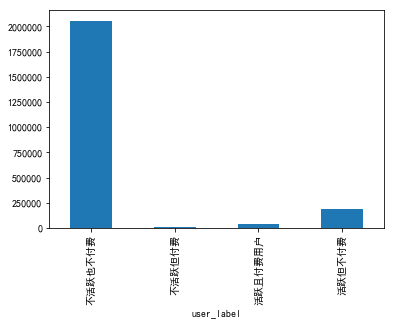

In [79]:
# 各类型用户占比，重点维护付费且活跃用户，重点发展付费但不活跃用户，一般维护活跃但不付费用户
data.groupby('user_label').user_id.count().plot.bar()


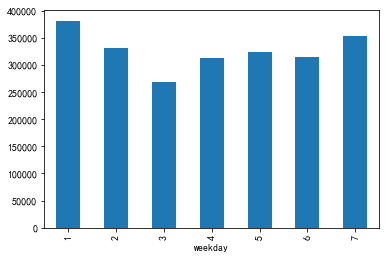

In [83]:
data['weekday'] = data.register_time.dt.weekday+1
# 不同星期新增用户数对比，周一与周日比较多，周三最少
data.groupby('weekday').user_id.count().plot.bar()